In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000714562"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000714562
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,FIRST FINANCIAL CORP /IN/
Ticker,THFF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,24.0,3.167750e+01,4.696760e+00,20.94,3.079250e+01,3.367500e+01,3.472250e+01,37.66
interest income,21.0,2.896914e+07,1.786077e+06,26977000.00,2.760300e+07,2.837600e+07,2.971900e+07,32903000.00
net income,30.0,8.359133e+06,2.385627e+06,2616000.00,7.258750e+06,8.308000e+06,8.914000e+06,15261000.00
net interest income,30.0,2.623693e+07,2.734586e+06,18457000.00,2.602375e+07,2.656800e+07,2.745625e+07,30684000.00
provision for loan losses,30.0,1.510133e+06,7.499644e+05,-356000.00,1.060250e+06,1.470000e+06,1.891000e+06,3021000.00


# Plots

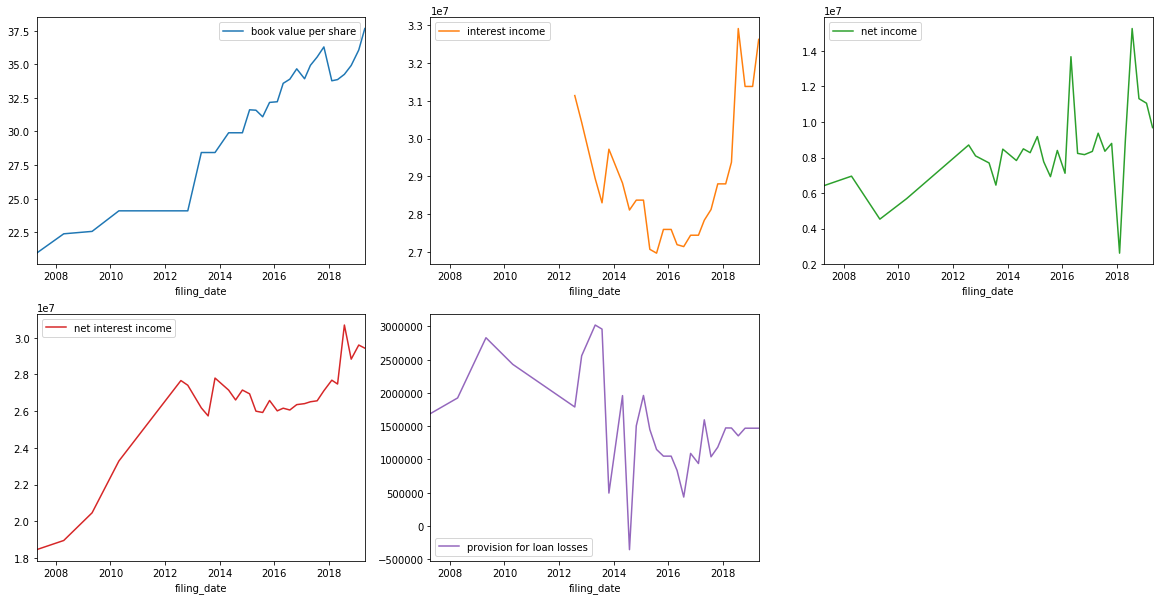

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000714562 book value per share        2007Q2 to 2007Q4: 3 periods  missing   
           book value per share        2008Q2 to 2008Q4: 3 periods  missing   
           book value per share        2009Q2 to 2009Q4: 3 periods  missing   
           book value per share       2010Q2 to 2012Q4: 11 periods  missing   
           book value per share        2013Q2 to 2013Q4: 3 periods  missing   
           book value per share        2014Q2 to 2014Q3: 2 periods  missing   
           interest income            2007Q1 to 2012Q1: 21 periods  missing   
           interest income                                  2012Q4  missing   
           interest income                                  2013Q4  missing   
           interest income                                  2014Q4  missing   
           interest income                                  2015Q4  missing   
           interest income                                  2016Q4  missing   
           interest income                                  2017Q4  missing   
           interest income                                  2018Q4  missing   
           net income                  2007Q2 to 2007Q4: 3 periods  missing   
           net income                  2008Q2 to 2008Q4: 3 periods  missing   
           net income                  2009Q2 to 2009Q4: 3 periods  missing   
           net income                  2010Q2 to 2012Q1: 8 periods  missing   
           net income                                       2012Q4  missing   
           net income                                       2013Q4  missing   
           net interest income         2007Q2 to 2007Q4: 3 periods  missing   
           net interest income         2008Q2 to 2008Q4: 3 periods  missing   
           net interest income         2009Q2 to 2009Q4: 3 periods  missing   
           net interest income         2010Q2 to 2012Q1: 8 periods  missing   
           net interest income                              2012Q4  missing   
           net interest income                              2013Q4  missing   
           provision for loan losses   2007Q2 to 2007Q4: 3 periods  missing   
           provision for loan losses   2008Q2 to 2008Q4: 3 periods  missing   
           provision for loan losses   2009Q2 to 2009Q4: 3 periods  missing   
           provision for loan losses   2010Q2 to 2012Q1: 8 periods  missing   
           provision for loan losses                        2012Q4  missing   
           provision for loan losses                        2013Q4  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0000714562 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing perio

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()